Question : Do countries with stronger press freedom have a more diverse media landscape? (Reword?)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data.csv", sep =";")

A little Overview

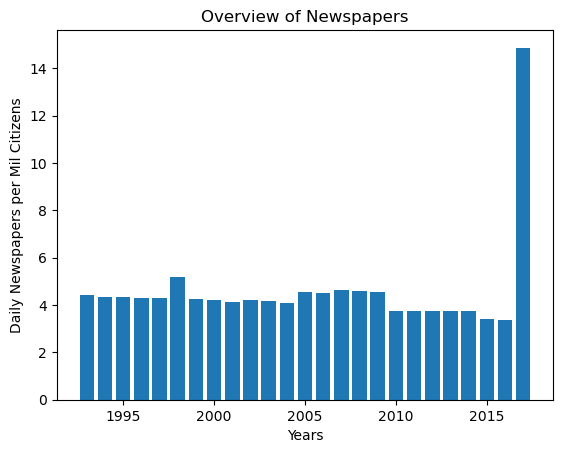

In [55]:
plt.bar(df["Year"], df["Newspaper"])
plt.xlabel("Years")
plt.ylabel("Daily Newspapers per Mil Citizens")
plt.title("Overview of Newspapers")
plt.show()

Constpress variable:  0 No mentions or binding treaty, 1 mentioned in constitution, 2 explicitly mentioned in constitution

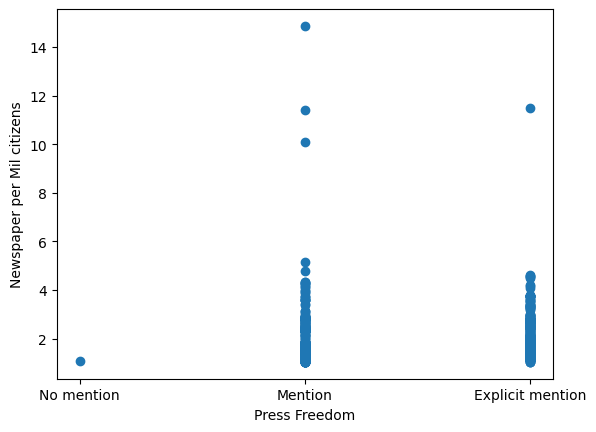

Constpress_recoded
0.0    1.064523
1.0    1.794127
2.0    2.013899
Name: Newspaper, dtype: float64

In [79]:

df["Constpress"] = pd.to_numeric(df["Constpress"], errors="coerce")


df_cleaned = df[["Constpress", "Newspaper", "Riot", "Demons"]].dropna()


df["Constpress"] = pd.to_numeric(df["Constpress"], errors="coerce")

vals = sorted(df_cleaned["Constpress"].dropna().unique())
mapping = {vals[0]:0, vals[1]:1, vals[2]:2}

df_cleaned["Constpress_recoded"] = df_cleaned["Constpress"].map(mapping)

# Plot
plt.scatter(df_cleaned["Constpress_recoded"], df_cleaned["Newspaper"])
plt.xticks([0,1,2], ["No mention", "Mention", "Explicit mention"])
plt.xlabel("Press Freedom")
plt.ylabel("Newspaper per Mil citizens")
plt.show()

df.groupby("Constpress_recoded")["Newspaper"].mean()


Do Riots happen more often with less press freedom?

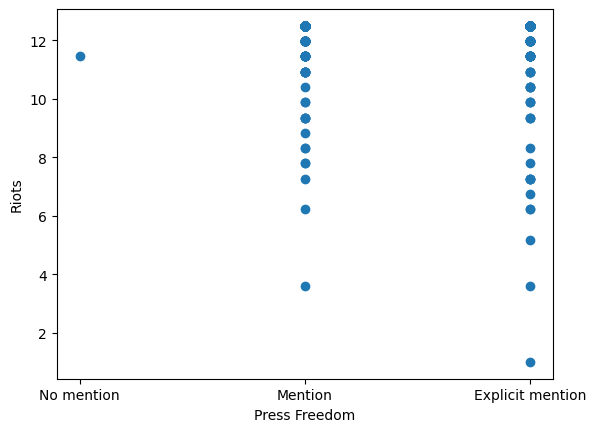

In [81]:

plt.scatter(df_cleaned["Constpress_recoded"], df_cleaned["Riot"])
plt.xticks([0,1,2], ["No mention", "Mention", "Explicit mention"])

plt.xlabel("Press Freedom")
plt.ylabel("Riots")
plt.show()

And how about demonstrations?

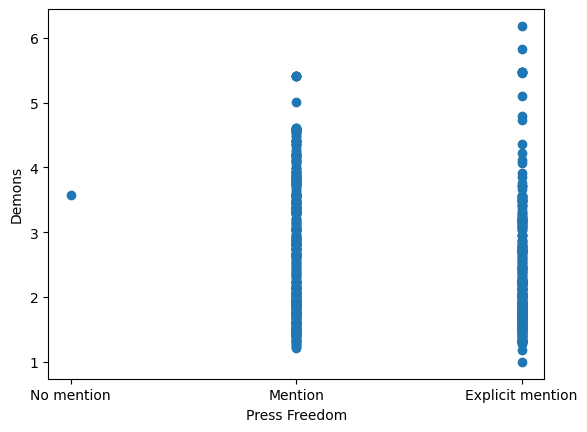

In [82]:
plt.scatter(df_cleaned["Constpress_recoded"], df_cleaned["Demons"])
plt.xticks([0,1,2], ["No mention", "Mention", "Explicit mention"])

plt.xlabel("Press Freedom")
plt.ylabel("Demons")
plt.show()

In [93]:
# Addition / Maybe helpful as an overview with numbers

df_cleaned["Free_dummy"] = (df_cleaned["Constpress_recoded"] == 0 ).astype(int)

df_cleaned.groupby("Free_dummy")[["Newspaper"]].mean()


,Newspaper
Free_dummy,
0,1.899692
1,1.064523
